# EDA – Análise Exploratória de Dados (Aprofundada)

Objetivo:
- Entender o comportamento do target (SalePrice)
- Avaliar qualidade dos dados
- Investigar valores ausentes e relações entre variáveis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH = "../data/train.csv"
df = pd.read_csv(DATA_PATH)
train_df = df.copy()

In [3]:
df.shape
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

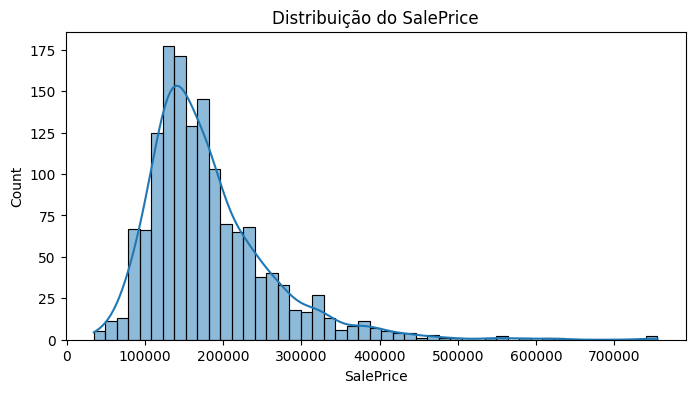

In [5]:
plt.figure(figsize=(8, 4))
sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribuição do SalePrice")
plt.show()


In [6]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

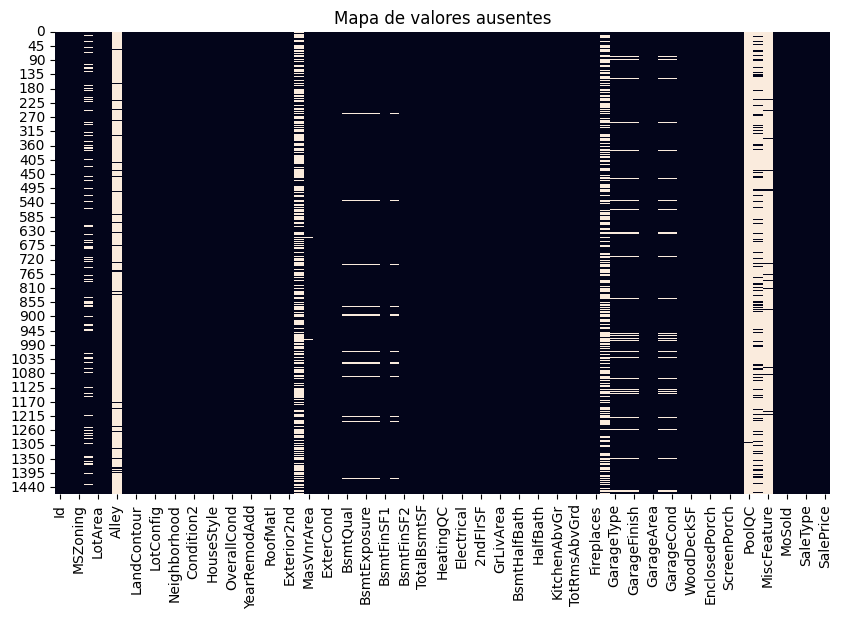

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de valores ausentes")
plt.show()


In [8]:
df.select_dtypes(include="object").nunique().sort_values(ascending=False)
                 


Neighborhood     25
Exterior2nd      16
Exterior1st      15
Condition1        9
SaleType          9
HouseStyle        8
RoofMatl          8
Condition2        8
Functional        7
BsmtFinType2      6
RoofStyle         6
BsmtFinType1      6
SaleCondition     6
Heating           6
Foundation        6
GarageType        6
ExterCond         5
LotConfig         5
MSZoning          5
GarageCond        5
GarageQual        5
HeatingQC         5
Electrical        5
BldgType          5
FireplaceQu       5
LandContour       4
LotShape          4
KitchenQual       4
MiscFeature       4
Fence             4
BsmtCond          4
ExterQual         4
BsmtExposure      4
BsmtQual          4
LandSlope         3
PoolQC            3
GarageFinish      3
PavedDrive        3
MasVnrType        3
Utilities         2
Alley             2
Street            2
CentralAir        2
dtype: int64

In [9]:
numerical_df = df.select_dtypes(include=["int64", "float64"])

In [10]:
corr_matrix = numerical_df.corr()

In [11]:

corr_target = corr_matrix["SalePrice"].sort_values(ascending=False)
corr_target.head(10)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

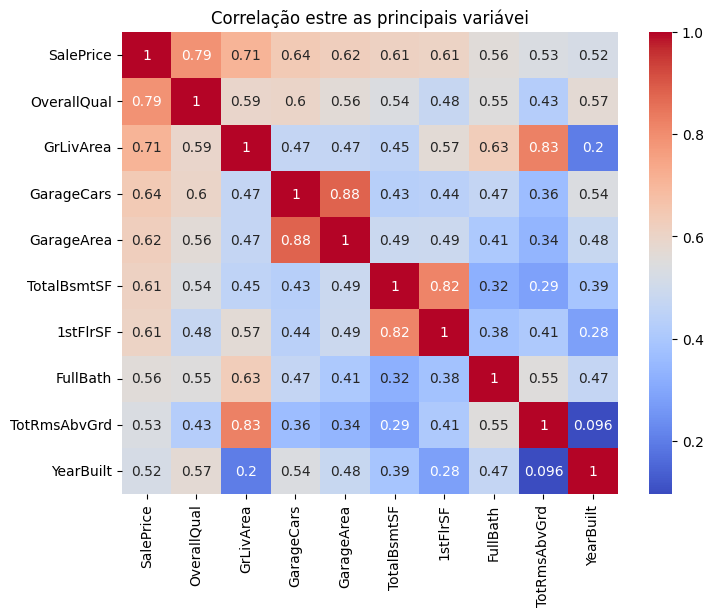

In [12]:
top_features = corr_target.index[:10]

plt.figure(figsize=(8, 6))
sns.heatmap(
    numerical_df[top_features].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlação estre as principais variávei")
plt.show()

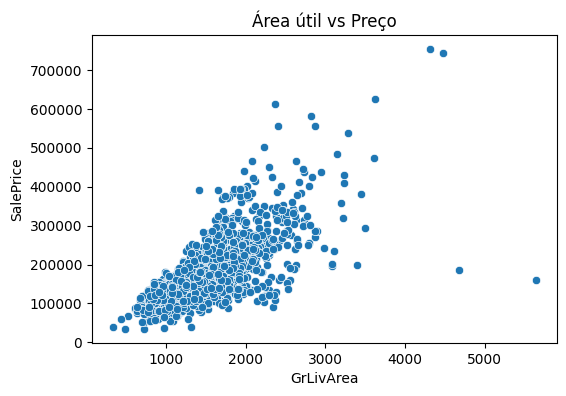

In [13]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x=df["GrLivArea"],
    y=df["SalePrice"]
)
plt.title("Área útil vs Preço")
plt.show()

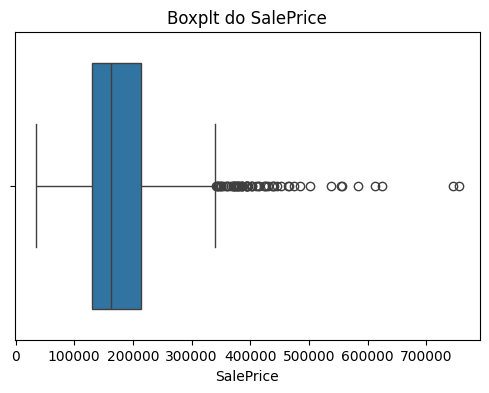

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["SalePrice"])
plt.title("Boxplt do SalePrice")
plt.show()

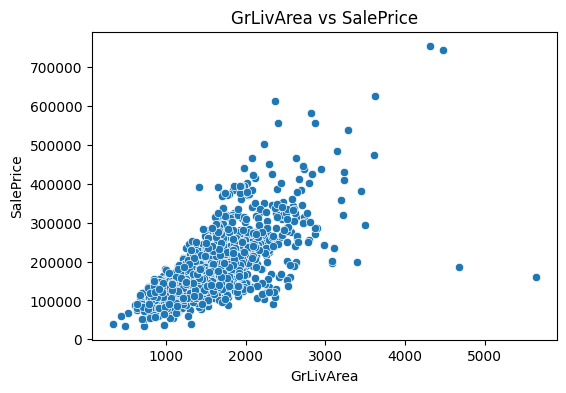

In [15]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x=df["GrLivArea"],
    y=df["SalePrice"]
)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("GrLivArea vs SalePrice")
plt.show()


In [16]:
df_outliers = df[
    (df["GrLivArea"] > 4000) & (df["SalePrice"] < 300000)
 ]

In [17]:
df_outliers.shape

(2, 81)

In [18]:
df = df.drop(df_outliers.index)

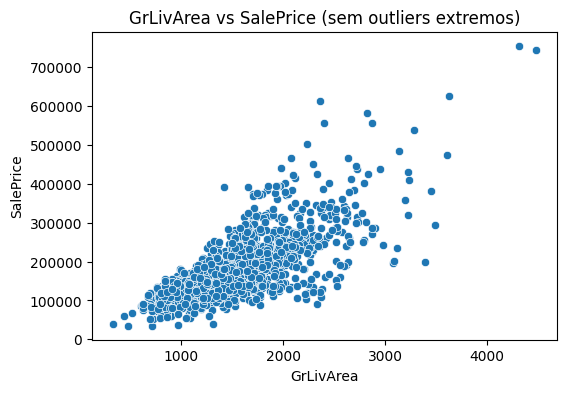

In [19]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x=df["GrLivArea"],
    y=df["SalePrice"]
)
plt.title("GrLivArea vs SalePrice (sem outliers extremos)")
plt.show()


In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
encoder = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=False

)

In [22]:
y = train_df["SalePrice"]
X = train_df.drop("SalePrice", axis=1)


In [23]:
X.shape
y.shape


(1460,)

In [24]:
y.describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

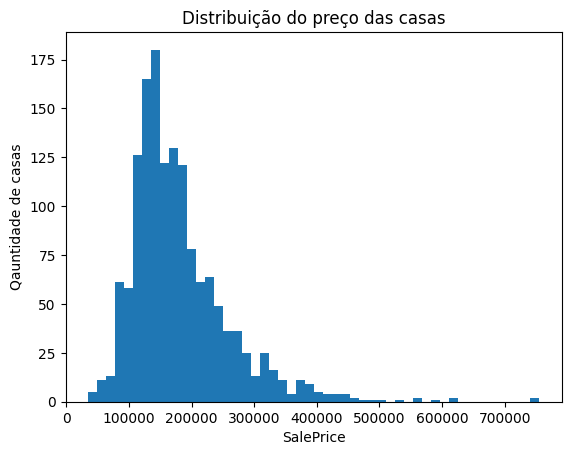

In [25]:
import matplotlib.pyplot as plt

plt.hist(y, bins=50)
plt.xlabel("SalePrice")
plt.ylabel("Qauntidade de casas")
plt.title("Distribuição do preço das casas")
plt.show()

In [26]:
y.skew()

np.float64(1.8828757597682129)

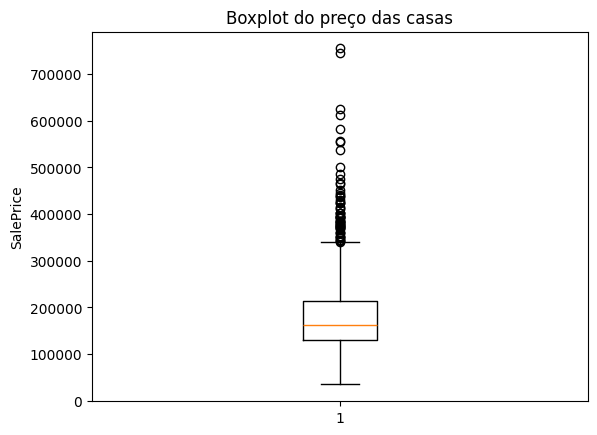

In [27]:
plt.boxplot(y)
plt.ylabel("SalePrice")
plt.title("Boxplot do preço das casas")
plt.show()


In [28]:
numeric_df = train_df.select_dtypes(exclude=["object"])


In [29]:
corr_matrix = numeric_df.corr()

In [30]:
corr_with_target = corr_matrix["SalePrice"].sort_values(ascending=False)
corr_with_target


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [31]:
corr_with_target.head(10)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

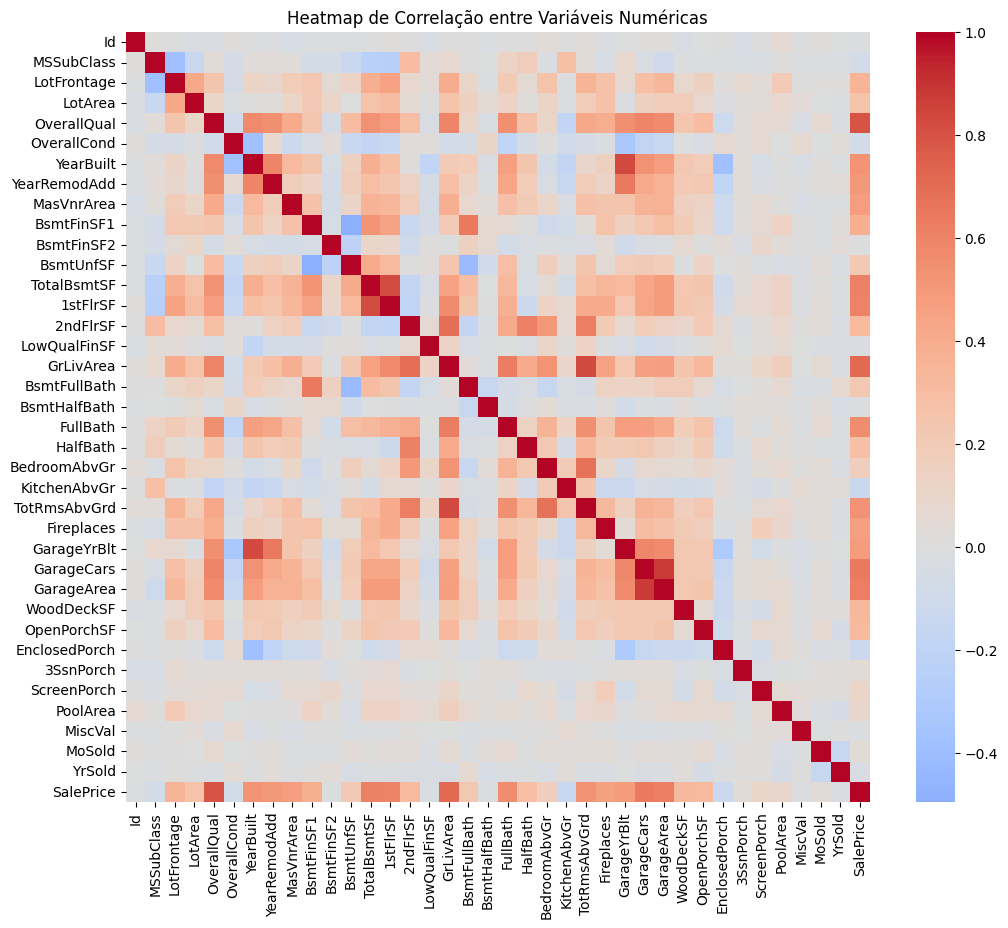

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Heatmap de Correlação entre Variáveis Numéricas")
plt.show()


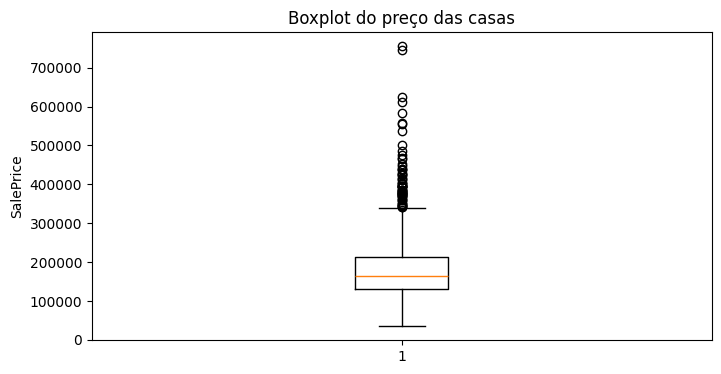

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.boxplot(y)
plt.ylabel("SalePrice")
plt.title("Boxplot do preço das casas")
plt.show()



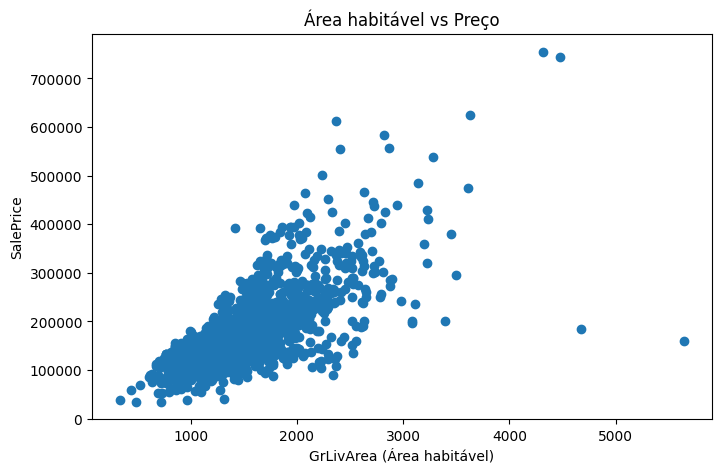

In [34]:
plt.figure(figsize=(8, 5))
plt.scatter(train_df["GrLivArea"], y)
plt.xlabel("GrLivArea (Área habitável)")
plt.ylabel("SalePrice")
plt.title("Área habitável vs Preço")
plt.show()


In [35]:
train_df[train_df["GrLivArea"] > 4000][["GrLivArea", "SalePrice"]]

,GrLivArea,SalePrice
523,4676,184750
691,4316,755000
1182,4476,745000
1298,5642,160000


In [36]:
train_df = train_df[train_df["GrLivArea"] < 4000]


In [37]:
y = train_df["SalePrice"]
X = train_df.drop("SalePrice", axis=1)


In [38]:
y_log = np.log1p(y)

In [39]:
y_log.describe()

count    1456.000000
mean       12.021950
std         0.396077
min        10.460271
25%        11.774528
50%        12.001512
75%        12.273736
max        13.345509
Name: SalePrice, dtype: float64

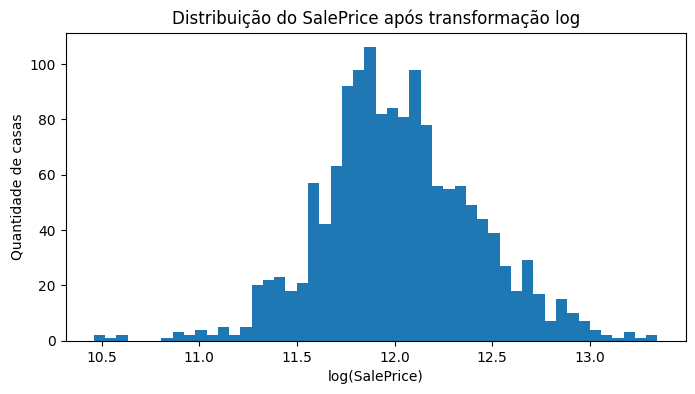

In [40]:
plt.figure(figsize=(8, 4))
plt.hist(y_log, bins=50)
plt.xlabel("log(SalePrice)")
plt.ylabel("Quantidade de casas")
plt.title("Distribuição do SalePrice após transformação log")
plt.show()


In [41]:
y_log.skew()


np.float64(0.06546006911025826)

In [42]:
corr_spearman = numeric_df.corr(method="spearman")


In [43]:
spearman_target = corr_spearman["SalePrice"].sort_values(ascending=False)
spearman_target


SalePrice        1.000000
OverallQual      0.809829
GrLivArea        0.731310
GarageCars       0.690711
YearBuilt        0.652682
GarageArea       0.649379
FullBath         0.635957
TotalBsmtSF      0.602725
GarageYrBlt      0.593788
1stFlrSF         0.575408
YearRemodAdd     0.571159
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
OpenPorchSF      0.477561
LotArea          0.456461
MasVnrArea       0.421309
LotFrontage      0.409076
WoodDeckSF       0.353802
HalfBath         0.343008
BsmtFinSF1       0.301871
2ndFlrSF         0.293598
BedroomAbvGr     0.234907
BsmtFullBath     0.225125
BsmtUnfSF        0.185197
ScreenPorch      0.100070
MoSold           0.069432
3SsnPorch        0.065440
PoolArea         0.058453
MSSubClass       0.007192
BsmtHalfBath    -0.012189
Id              -0.018546
YrSold          -0.029899
BsmtFinSF2      -0.038806
MiscVal         -0.062727
LowQualFinSF    -0.067719
OverallCond     -0.129325
KitchenAbvGr    -0.164826
EnclosedPorch   -0.218394
Name: SalePr

In [44]:
spearman_target.head(10)


SalePrice      1.000000
OverallQual    0.809829
GrLivArea      0.731310
GarageCars     0.690711
YearBuilt      0.652682
GarageArea     0.649379
FullBath       0.635957
TotalBsmtSF    0.602725
GarageYrBlt    0.593788
1stFlrSF       0.575408
Name: SalePrice, dtype: float64

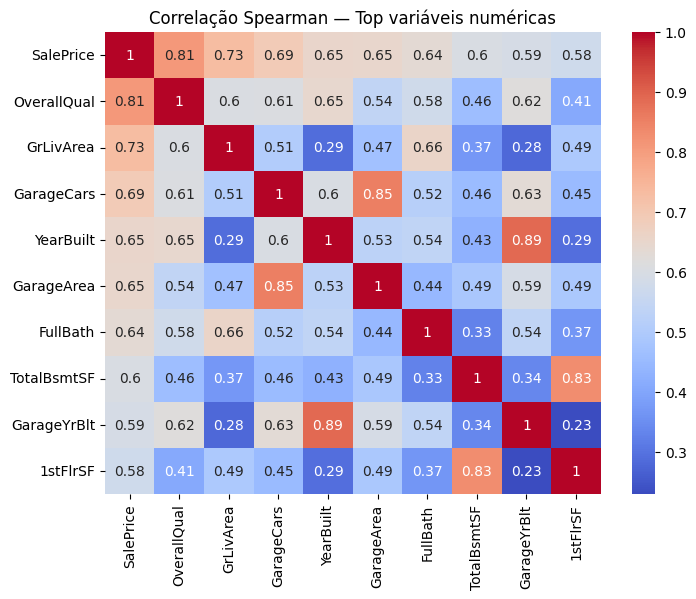

In [45]:
top_features_spearman = spearman_target.index[:10]

plt.figure(figsize=(8, 6))
sns.heatmap(
    numeric_df[top_features_spearman].corr(method="spearman"),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlação Spearman — Top variáveis numéricas")
plt.show()


Foram identificados outliers extremos na relação entre GrLivArea e SalePrice, caracterizados por áreas habitáveis muito elevadas associadas a preços inesperadamente baixos. Esses pontos foram removidos por quebrarem a relação monotônica esperada e influenciarem negativamente a análise estatística. Outliers restantes foram mantidos por representarem variações reais do mercado imobiliário.

In [46]:
numerical_continuous = [
    "LotArea",
    "GrLivArea",
    "TotalBsmtSF",
    "GarageArea",
    "1stFlrSF",
    "2ndFlrSF"
]

numerical_discrete = [
    "BedroomAbvGr",
    "TotRmsAbvGrd",
    "GarageCars",
    "FullBath",
    "HalfBath"
]

ordinal_features = [
    "OverallQual",
    "OverallCond",
    "ExterQual",
    "ExterCond",
    "KitchenQual",
    "HeatingQC"
]

nominal_features = [
    "Neighborhood",
    "HouseStyle",
    "MSZoning",
    "SaleCondition",
    "BldgType",
    "RoofStyle"
]


In [47]:
numeric_features = X.select_dtypes(include=["int64", "float64"])
corr_features = numeric_features.corr()

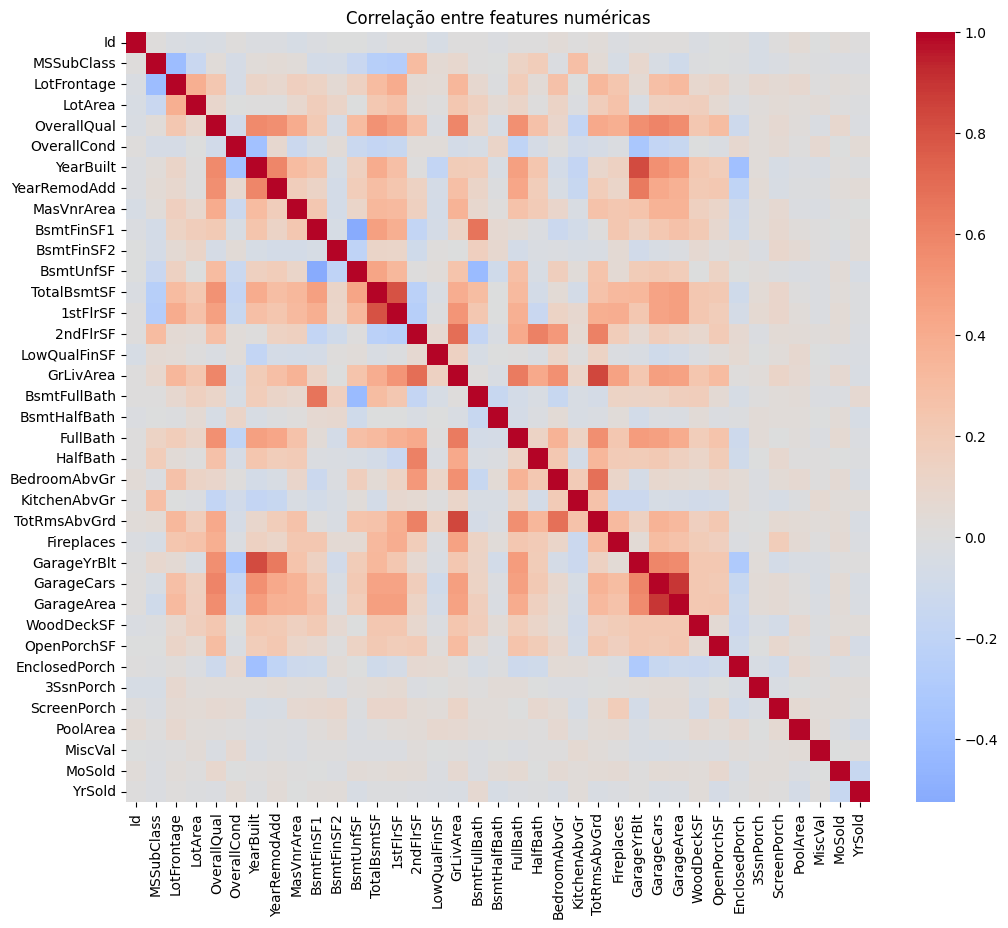

In [48]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_features, cmap="coolwarm", center=0)
plt.title("Correlação entre features numéricas")
plt.show()


In [49]:
X["TotalHouseArea"] = (
    X["GrLivArea"] +
    X["TotalBsmtSF"]
)


In [50]:
X["HouseAge"] = X["YrSold"] - X["YearBuilt"]


In [51]:
X["YearsSinceRemodel"] = X["YrSold"] - X["YearRemodAdd"]


In [52]:
X["TotalBathrooms"] = (
    X["FullBath"] +
    0.5 * X["HalfBath"] +
    X["BsmtFullBath"] +
    0.5 * X["BsmtHalfBath"]
)


In [53]:
X["HasGarage"] = (X["GarageArea"] > 0).astype(int)


In [54]:
categorical_cols = X.select_dtypes(include="object").columns
numerical_cols = X.select_dtypes(exclude="object").columns


In [55]:
X_encoded = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True
)


In [56]:
X_encoded.shape


(1456, 249)

In [57]:
X_encoded.dtypes.value_counts()


bool       207
int64       38
float64      4
Name: count, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42
)


In [59]:
from sklearn.metrics import mean_squared_error


In [60]:
from sklearn.linear_model import LinearRegression


In [61]:
baseline_model = LinearRegression()


In [62]:
X_train.isna().sum().sort_values(ascending=False).head(10)


LotFrontage    221
GarageYrBlt     64
MasVnrArea       5
LotArea          0
Id               0
OverallQual      0
OverallCond      0
YearBuilt        0
MSSubClass       0
BsmtFinSF1       0
dtype: int64

In [63]:
from sklearn.impute import SimpleImputer


In [64]:
num_imputer = SimpleImputer(strategy="median")


In [65]:
X_train_imputed = num_imputer.fit_transform(X_train)
X_val_imputed = num_imputer.transform(X_val)


In [66]:
baseline_model = LinearRegression()
baseline_model.fit(X_train_imputed, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [67]:
y_train_pred = baseline_model.predict(X_train_imputed)
y_val_pred = baseline_model.predict(X_val_imputed)


In [68]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)

rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)

print(f"RMSE Treino: {rmse_train:.2f}")
print(f"RMSE Validação: {rmse_val:.2f}")


RMSE Treino: 18383.42
RMSE Validação: 22988.25


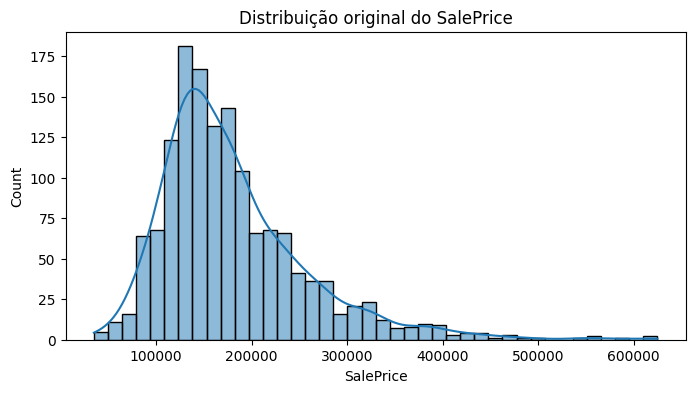

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(y, kde=True)
plt.title("Distribuição original do SalePrice")
plt.xlabel("SalePrice")
plt.show()

In [71]:
import numpy as np

y_log = np.log1p(y)


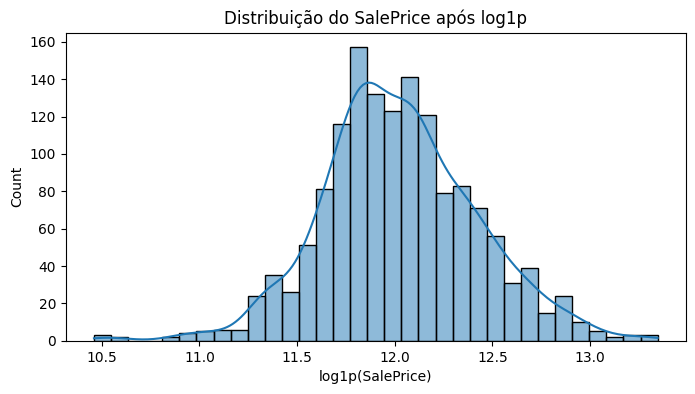

In [72]:
plt.figure(figsize=(8, 4))
sns.histplot(y_log, kde=True)
plt.title("Distribuição do SalePrice após log1p")
plt.xlabel("log1p(SalePrice)")
plt.show()

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


In [79]:
X_train, X_val, y_train_log, y_val_log = train_test_split(
    X_encoded,
    y_log,
    test_size=0.2,
    random_state=42
)


In [80]:
num_imputer = SimpleImputer(strategy="median")

X_train_imputed = num_imputer.fit_transform(X_train)
X_val_imputed = num_imputer.transform(X_val)


In [81]:
baseline_model_log = LinearRegression()

baseline_model_log.fit(X_train_imputed, y_train_log)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [82]:
y_train_log_pred = baseline_model_log.predict(X_train_imputed)
y_val_log_pred = baseline_model_log.predict(X_val_imputed)


In [83]:
y_train_pred = np.expm1(y_train_log_pred)
y_val_pred = np.expm1(y_val_log_pred)

y_train_true = np.expm1(y_train_log)
y_val_true = np.expm1(y_val_log)


In [84]:
rmse_train = mean_squared_error(y_train_true, y_train_pred) ** 0.5
rmse_val = mean_squared_error(y_val_true, y_val_pred) ** 0.5

print(f"RMSE Treino (log target): {rmse_train:.2f}")
print(f"RMSE Validação (log target): {rmse_val:.2f}")


RMSE Treino (log target): 15870.04
RMSE Validação (log target): 20900.35
